In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.phonon.plotter import PhononBSPlotter
import numpy as np
import matplotlib.pyplot as plt
from math import pi

In [2]:
# Télécharge le ﬁchier CIF du matériau mp-9437 et le convertit dans des structures pymatgen voulues

with MPRester("Dgm7hLo14n65cHTX") as m:

    phononstructure = m.get_phonon_bandstructure_by_material_id("mp-9437")

phpbs = PhononBSPlotter(phononstructure)

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:455: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:456: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



# Les différentes branches acoustiques du matériau mp-9437.

<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

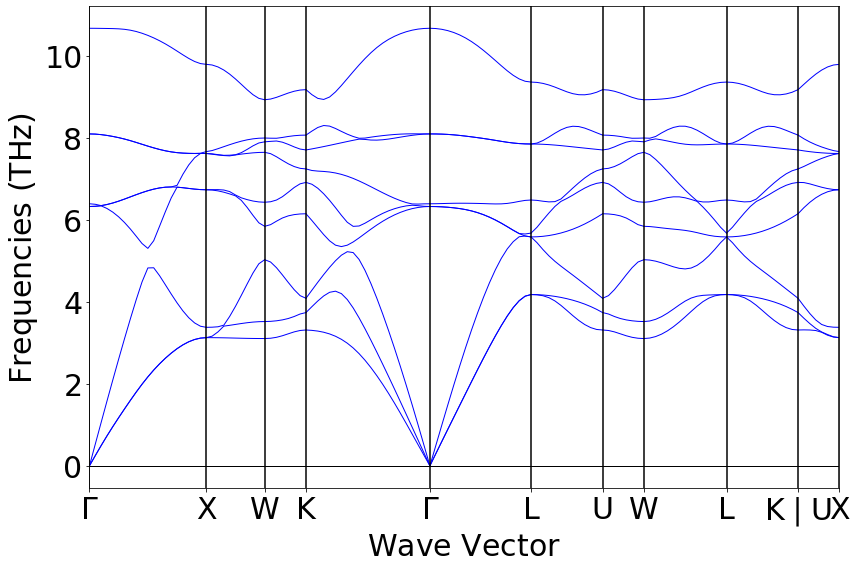

In [3]:
# Affichage de la structure de bandes des phonos

phpbs.get_plot()

# Calcul de la vitesse du son.

La vitesse du son est donné par : 
$$\omega = v_s |q|$$ 
pour des valeurs de $\omega$ proche de 0. $v_s$ selon une direction est donc la pente de la tangente à la branche acoustique en question selon cette même direction pour $\omega$ = 0. 

Pour rappel, la fréquence angulaire est obtenue simplement en multipliant la fréquence, donnée par le graphique ci-dessus, par la relation : 
$$ \omega = 2\pi f$$

In [4]:
# Détermination des 3 branches qui contiennent des valeurs de f = 0.

vecteurOnde = phpbs.bs_plot_data().get('distances')
vecteurFrequence = phpbs.bs_plot_data().get('frequency')
directions = phpbs.bs_plot_data().get('ticks').get('label')

branche  = []  #quelle branche acoustique?
zone     = []  #quelle direction?
position = []  #début ou fin de la zone?

counter = 0

for i in range(len(vecteurFrequence)):
    for j in range(len(vecteurFrequence[i])):
        
        # On sait que les 0 éventuels sont aux extrémités des directions
        if vecteurFrequence[i][j][0] == 0 and j not in branche and i not in zone:
            branche.append(j)
            zone.append(i)
            position.append((0,1))
            counter += 1
            break
        elif vecteurFrequence[i][j][-1] == 0 and j not in branche and i not in zone:
            branche.append(j)
            zone.append(i)
            position.append((-2,-1))
            counter += 1
            break
    
    if counter == 3:
        break
        
print("La première vitesse du son sera calculée sur la branche acoustique", branche[0]+1)
print("selon la direction ", directions[zone[0]*2],"-",directions[zone[0]*2+1], 
      "en",directions[zone[0]*2-int((position[0][0])*(1/2))] ,".\n" )

print("La première vitesse du son sera calculée sur la branche acoustique", branche[1]+1)
print("selon la direction ", directions[zone[1]*2],"-",directions[zone[1]*2+1], 
      "en",directions[zone[1]*2-int((position[1][0])*(1/2))] ,".\n" )

print("La première vitesse du son sera calculée sur la branche acoustique", branche[2]+1)
print("selon la direction ", directions[zone[2]*2],"-",directions[zone[2]*2+1], 
      "en",directions[zone[2]*2-int((position[2][0])*(1/2))] ,"." )

La première vitesse du son sera calculée sur la branche acoustique 1
selon la direction  $\Gamma$ - X en $\Gamma$ .

La première vitesse du son sera calculée sur la branche acoustique 2
selon la direction  K - $\Gamma$ en $\Gamma$ .

La première vitesse du son sera calculée sur la branche acoustique 3
selon la direction  $\Gamma$ - L en $\Gamma$ .


In [5]:
# Détermination des tangentes dont la pente est la vitesse du son

tangentes = []  #2d : contient les tangentes
absices = []    #2d : contient les abscisses où sont évaluées les droites
coef = []       #2d : contient coef de la droite

for i in range(3):
    
    pointsToFit = np.array([vecteurFrequence[zone[i]][branche[i]][position[i][0]],
                       vecteurFrequence[zone[i]][branche[i]][position[i][1]]])
    
    absToFit = np.array([vecteurOnde[zone[i]][position[i][0]], vecteurOnde[zone[i]][position[i][1]]])

    coef.append(np.polyfit(absToFit,pointsToFit,1))
    
    absices.append(np.linspace(vecteurOnde[zone[i]][0],vecteurOnde[zone[i]][-1],100))
    
    tangentes.append(coef[i][0] * absices[i] + coef[i][1])

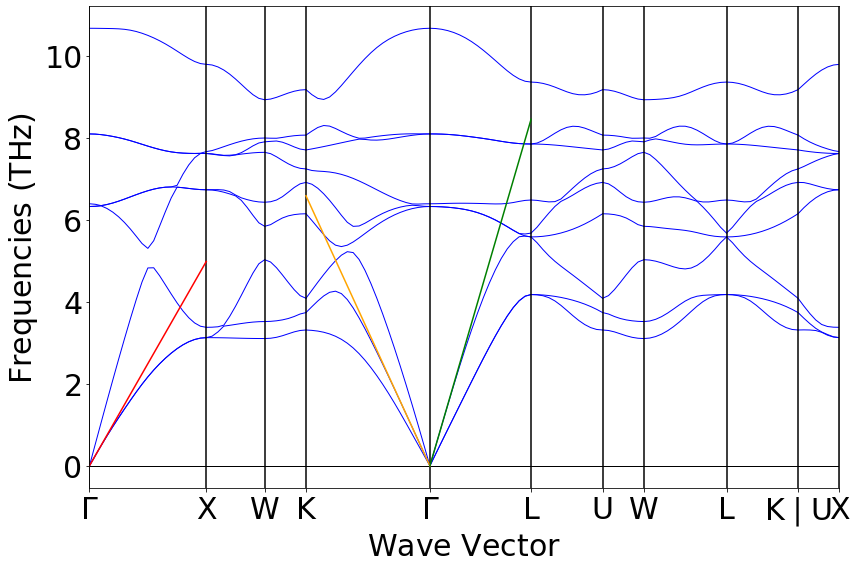

In [6]:
# Affichage des tangentes dont la pente est la vitesse du son

phpbs.get_plot()
plt.plot(absices[0], tangentes[0], color = 'red')
plt.plot(absices[1], tangentes[1], color = 'orange')
plt.plot(absices[2], tangentes[2], color = 'green')
plt.show()

Nous pouvons maintenant calculer la vitesse du son. En effet, il s'agit de la valeur absolue de la pente de la tangente calculée ci-dessus.

Il faut convertir les données en celles voulues. Le graphique ci-dessus donne la fréquence et non la fréquence angulaire. Il faut donc multiplier par $2\pi$ afin d'effectuer ce changement. Les unités de cette fréquence angulaire sont maintenant des teraradians par seconde, il faut donc multiplier par un facteur $10^{12}$. Et celles du vecteur d'onde sont des ångströms, il faut donc multiplier par $10^{-10}$. Nous obtenons alors :

In [7]:
# Affichage de la vitesse du son

print("La vitesse du son sur la branche acoustique", branche[0]+1)
print("selon la direction ", directions[zone[0]*2],"-",directions[zone[0]*2+1], 
      "en",directions[zone[0]*2-int((position[0][0])*(1/2))] ,"est :", abs(2*pi*coef[0][0]*1e2), "m/s.\n" )

print("La vitesse du son sur la branche acoustique", branche[1]+1)
print("selon la direction ", directions[zone[1]*2],"-",directions[zone[1]*2+1], 
      "en",directions[zone[1]*2-int((position[1][0])*(1/2))] ,"est :", abs(2*pi*coef[1][0]*1e2), "m/s.\n" )

print("La vitesse du son sur la branche acoustique", branche[2]+1)
print("selon la direction ", directions[zone[2]*2],"-",directions[zone[2]*2+1], 
      "en",directions[zone[2]*2-int((position[2][0])*(1/2))] ,"est :", abs(2*pi*coef[2][0]*1e2), "m/s." )

La vitesse du son sur la branche acoustique 1
selon la direction  $\Gamma$ - X en $\Gamma$ est : 2935.7966810737153 m/s.

La vitesse du son sur la branche acoustique 2
selon la direction  K - $\Gamma$ en $\Gamma$ est : 3657.5250302408067 m/s.

La vitesse du son sur la branche acoustique 3
selon la direction  $\Gamma$ - L en $\Gamma$ est : 5747.436759973144 m/s.


Les trois vitesses du son calculées sont 2936, 3658 et 5747 m/s.